In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3

In [22]:
# loading data from the Excel sheet
file_path = 'cleaned_salary_data_states.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows to confirm the structure
print(data.head())

          CASE_NUMBER CASE_STATUS CASE_RECEIVED_DATE DECISION_DATE  \
0  I-200-14073-248840      denied         2014-03-14    2014-03-21   
1       A-15061-55212      denied         2015-03-19    2015-03-19   
2  I-200-13256-001092      denied         2013-09-13    2013-09-23   
3  I-200-14087-353657      denied         2014-03-28    2014-04-07   
4  I-203-14259-128844      denied         2014-09-16    2014-09-23   

                                       EMPLOYER_NAME  \
0                ADVANCED TECHNOLOGY GROUP USA, INC.   
1                     SAN FRANCISCO STATE UNIVERSITY   
2                                    CAROUSEL SCHOOL   
3  HARLINGEN CONSOLIDATED INDEPENDENT SCHOOL DIST...   
4                        SIGNAL SCIENCES CORPORATION   

   PREVAILING_WAGE_SUBMITTED PREVAILING_WAGE_SUBMITTED_UNIT  \
0                  6217100.0                           year   
1                  5067600.0                           year   
2                  4947000.0                         

C:\Users\saras\AppData\Local\Temp\ipykernel_75200\4033022395.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='EDUCATION_LEVEL_REQUIRED', y='PAID_WAGE_PER_YEAR', data=avg_salary_by_education, palette='viridis')


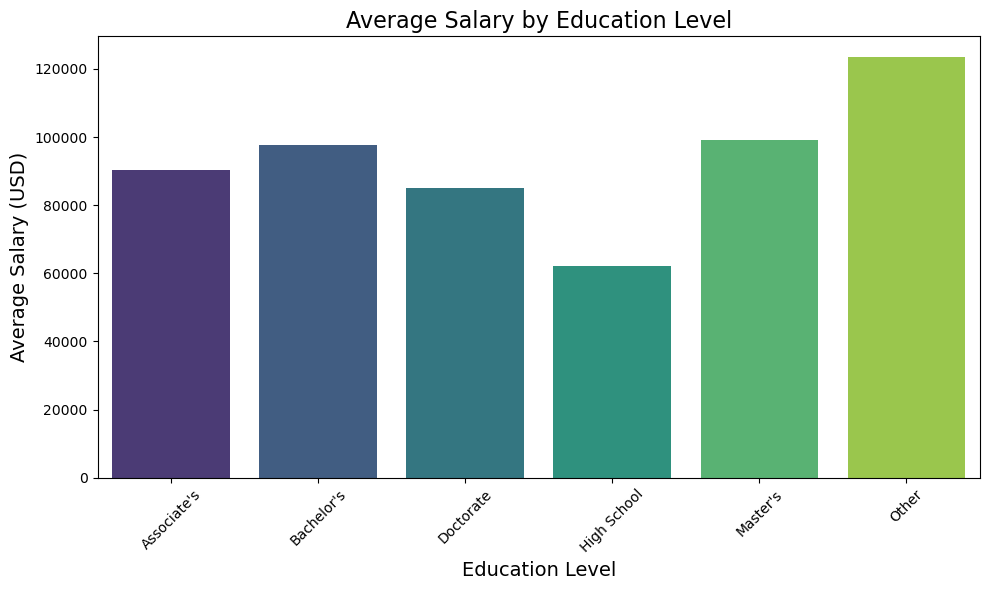

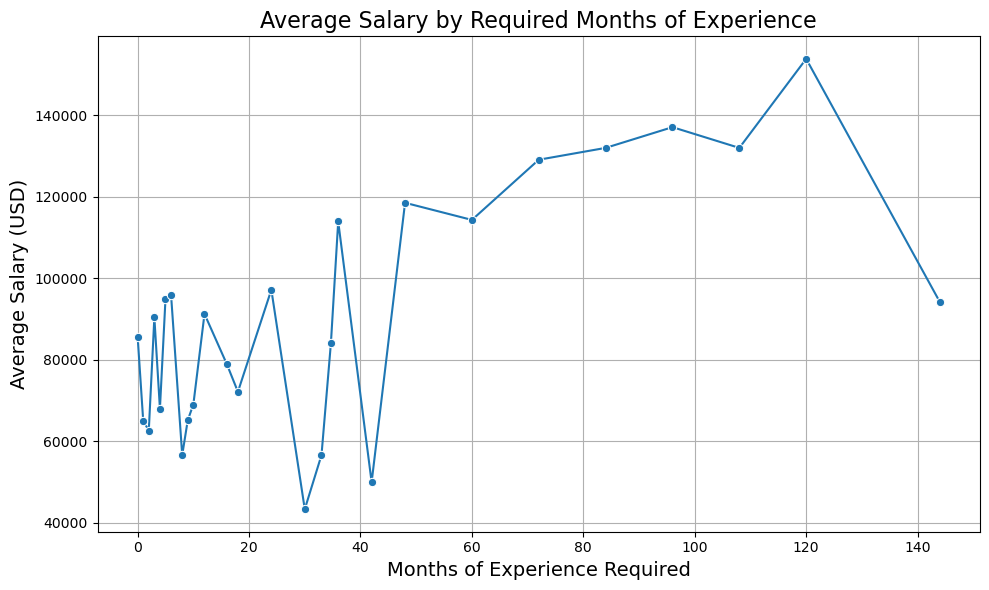

In [34]:
# IV. How do job requirements (education, experience) impact salaries?

# Sub-question 1: Education Level vs. Average Salary
avg_salary_by_education = data.groupby('EDUCATION_LEVEL_REQUIRED')['PAID_WAGE_PER_YEAR'].mean().reset_index()

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='EDUCATION_LEVEL_REQUIRED', y='PAID_WAGE_PER_YEAR', data=avg_salary_by_education, palette='viridis')
plt.title('Average Salary by Education Level', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Average Salary (USD)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Sub-question 2: Months of Experience vs. Salary
exp_salary = data.groupby('EXPERIENCE_REQUIRED_NUM_MONTHS')['PAID_WAGE_PER_YEAR'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='EXPERIENCE_REQUIRED_NUM_MONTHS', y='PAID_WAGE_PER_YEAR', data=exp_salary, marker='o')
plt.title('Average Salary by Required Months of Experience', fontsize=16)
plt.xlabel('Months of Experience Required', fontsize=14)
plt.ylabel('Average Salary (USD)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\saras\AppData\Local\Temp\ipykernel_75200\3275774330.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='WORK_STATE', x='Job_Count', data=jobs_by_state, palette='coolwarm')


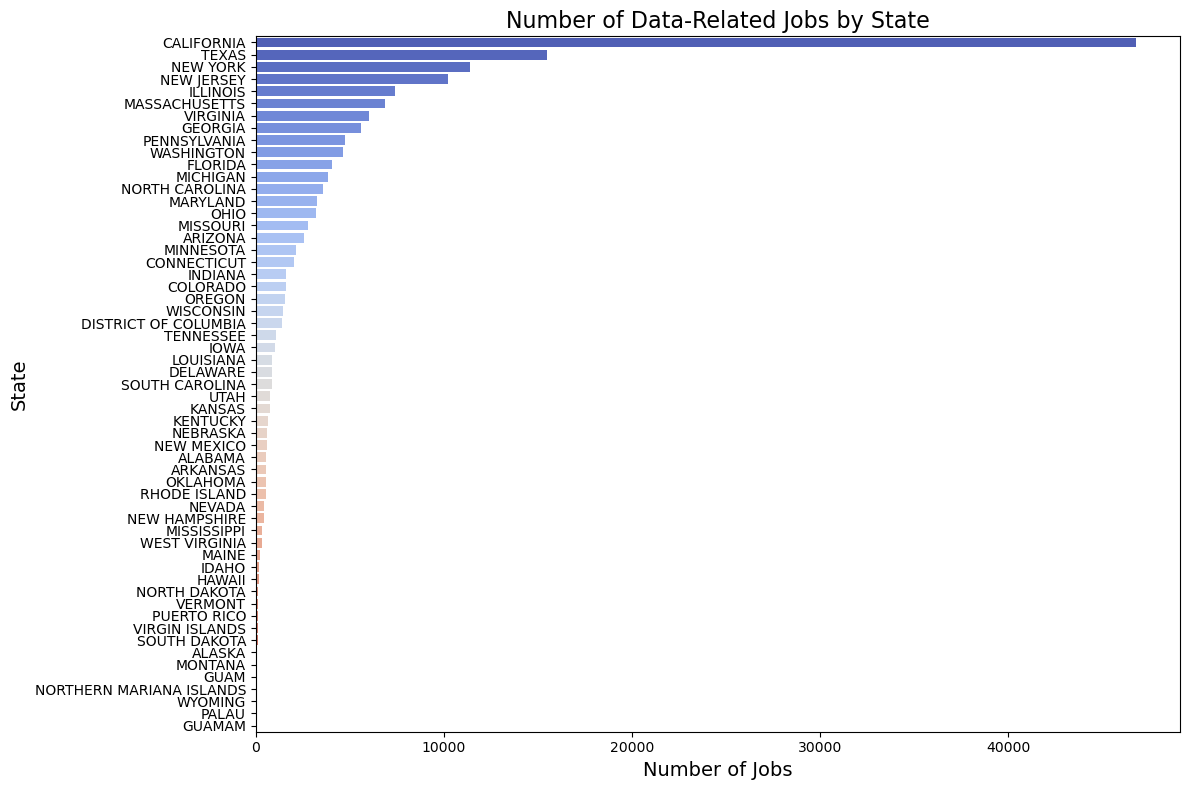

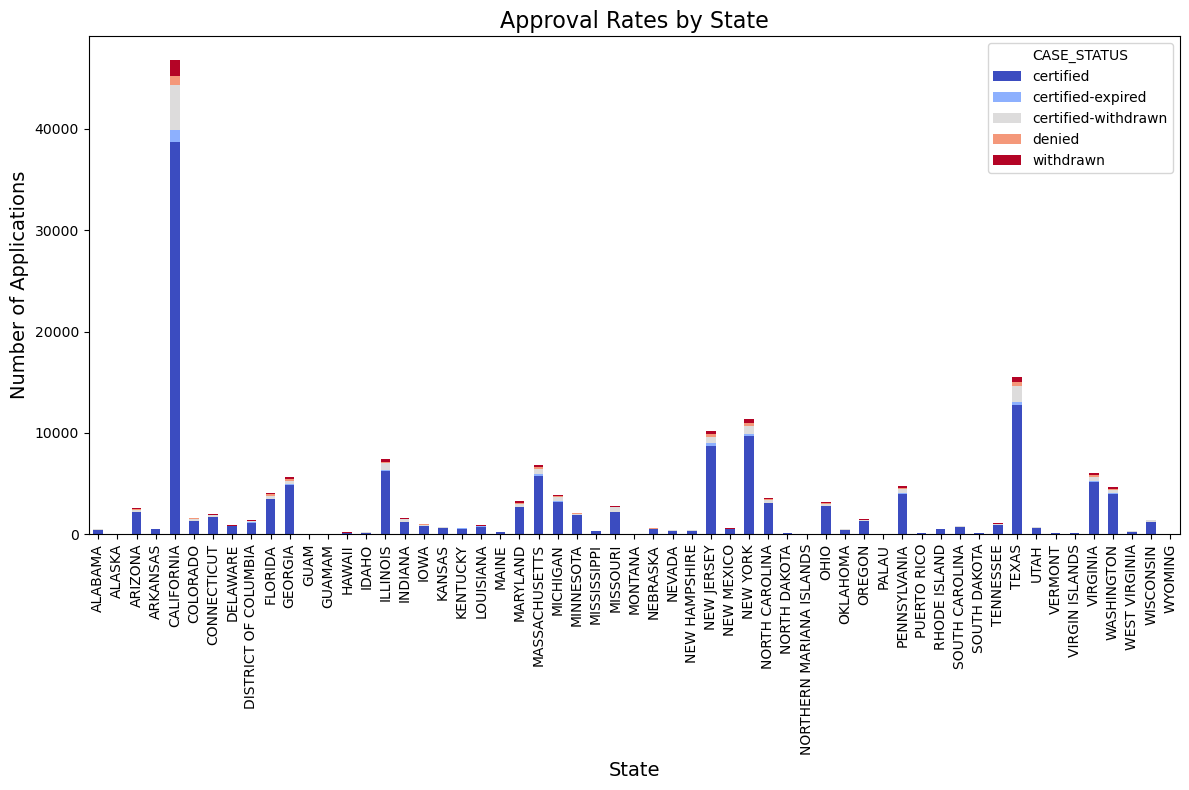

In [36]:
#V. Are there regional differences in demand for data-related jobs?

# Sub-question 1: Jobs by State
jobs_by_state = data['WORK_STATE'].value_counts().reset_index()
jobs_by_state.columns = ['WORK_STATE', 'Job_Count']

plt.figure(figsize=(12, 8))
sns.barplot(y='WORK_STATE', x='Job_Count', data=jobs_by_state, palette='coolwarm')
plt.title('Number of Data-Related Jobs by State', fontsize=16)
plt.xlabel('Number of Jobs', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.tight_layout()
plt.show()

# Sub-question 2: Approval Rates by Region
approval_rates = data.groupby(['WORK_STATE', 'CASE_STATUS']).size().unstack(fill_value=0)
approval_rates.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='coolwarm')

plt.title('Approval Rates by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Number of Applications', fontsize=14)
plt.tight_layout()
plt.show()

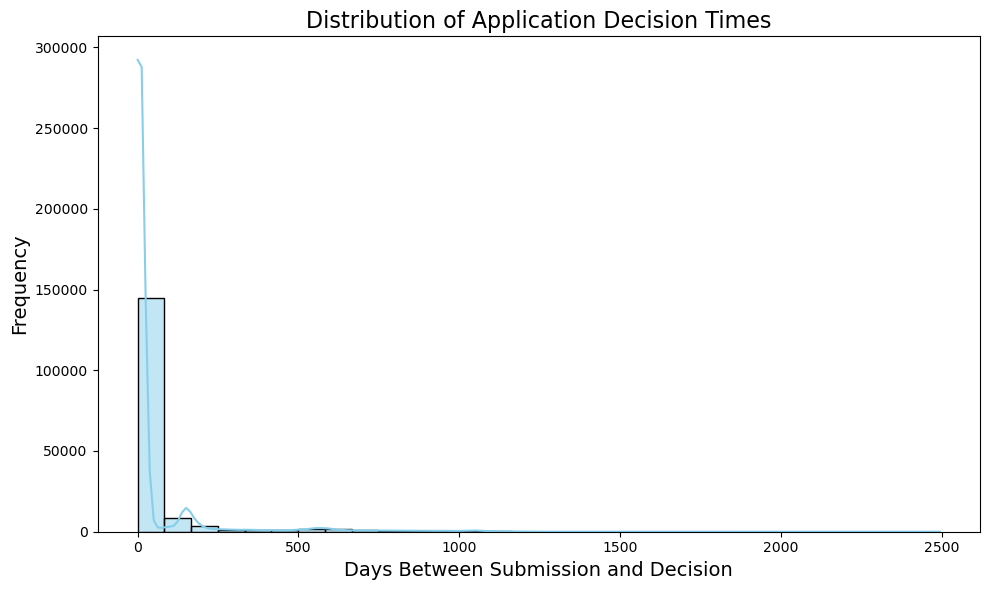

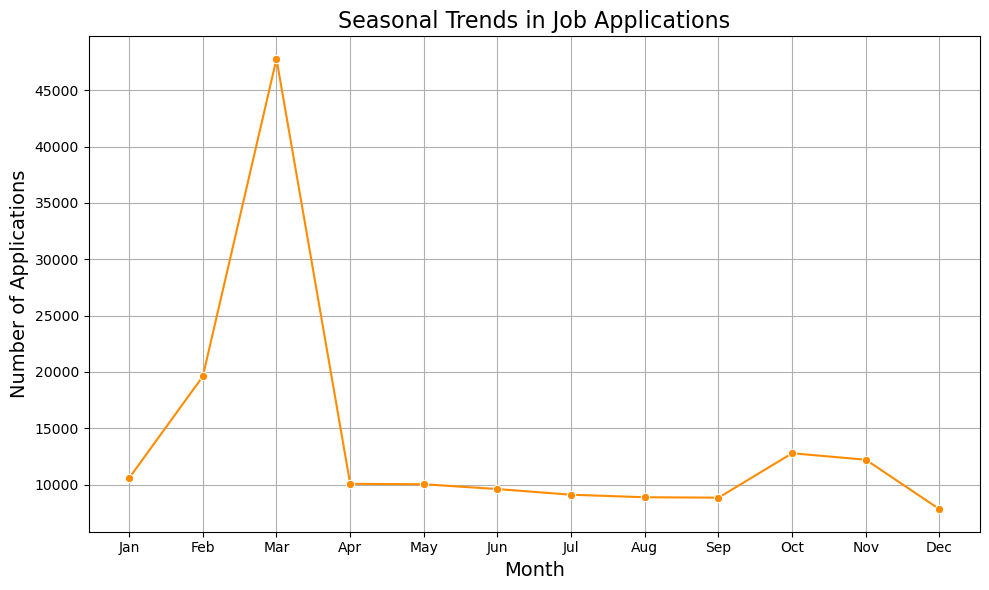

In [40]:
#VI. What trends exist in job application and decision timelines?

# Sub-question 1: Application Decision Times
data['APPLICATION_DECISION_TIME'] = (pd.to_datetime(data['DECISION_DATE']) - pd.to_datetime(data['CASE_RECEIVED_DATE'])).dt.days

plt.figure(figsize=(10, 6))
sns.histplot(data['APPLICATION_DECISION_TIME'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Application Decision Times', fontsize=16)
plt.xlabel('Days Between Submission and Decision', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.show()


# Sub-question 2: Seasonal Trends
data['RECEIVED_MONTH'] = pd.to_datetime(data['CASE_RECEIVED_DATE']).dt.month
seasonal_trends = data['RECEIVED_MONTH'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=seasonal_trends.index, y=seasonal_trends.values, marker='o', color='darkorange')
plt.title('Seasonal Trends in Job Applications', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Applications', fontsize=14)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()